In [1]:
#!pip install numpy -q
#!pip install pandas -q
#!pip install matplotlib -q
#!pip install tensorflow -q


In [1]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

Loading training data...
Found 14994 files belonging to 6 classes.
Using 11996 files for training.
Loading validation data...
Found 14994 files belonging to 6 classes.
Using 2998 files for validation.
Loading test data...
Found 3000 files belonging to 6 classes.
Classes found: ['exam', 'form', 'newspaper', 'note', 'story', 'word']
Applying data augmentation...
Data preprocessing completed!
Creating transfer learning model with MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 39s 4us/step
Compiling model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,053,894 (11.65 MB)

 Trainable params: 792,326 (3.02 MB)

 Non-trainable params: 2,261,568 (8.63 MB)

Starting training...

PHASE 1: Training with frozen base model
Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.7900 - loss: 0.6395
Epoch 1: val_accuracy improved from None to 0.91995, saving model to best_document_classifier_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 268s 695ms/step - accuracy: 0.8540 - loss: 0.4235 - val_accuracy: 0.9199 - val_loss: 0.1970 - learning_rate: 0.0010
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.8962 - loss: 0.2709
Epoch 2: val_accuracy improved from 0.91995 to 0.94096, saving model to best_document_classifier_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 296s 788ms/step - accuracy: 0.9020 - loss: 0.2521 - val_accuracy: 0.9410 - val_loss: 0.1585 - learning_rate: 0.0010
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9026 - loss: 0.2535
Epoch 3: val_accuracy improved from 0.94096 to 0.94229, saving model to best_document_classifier_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 273s 724ms/step - accuracy: 0.

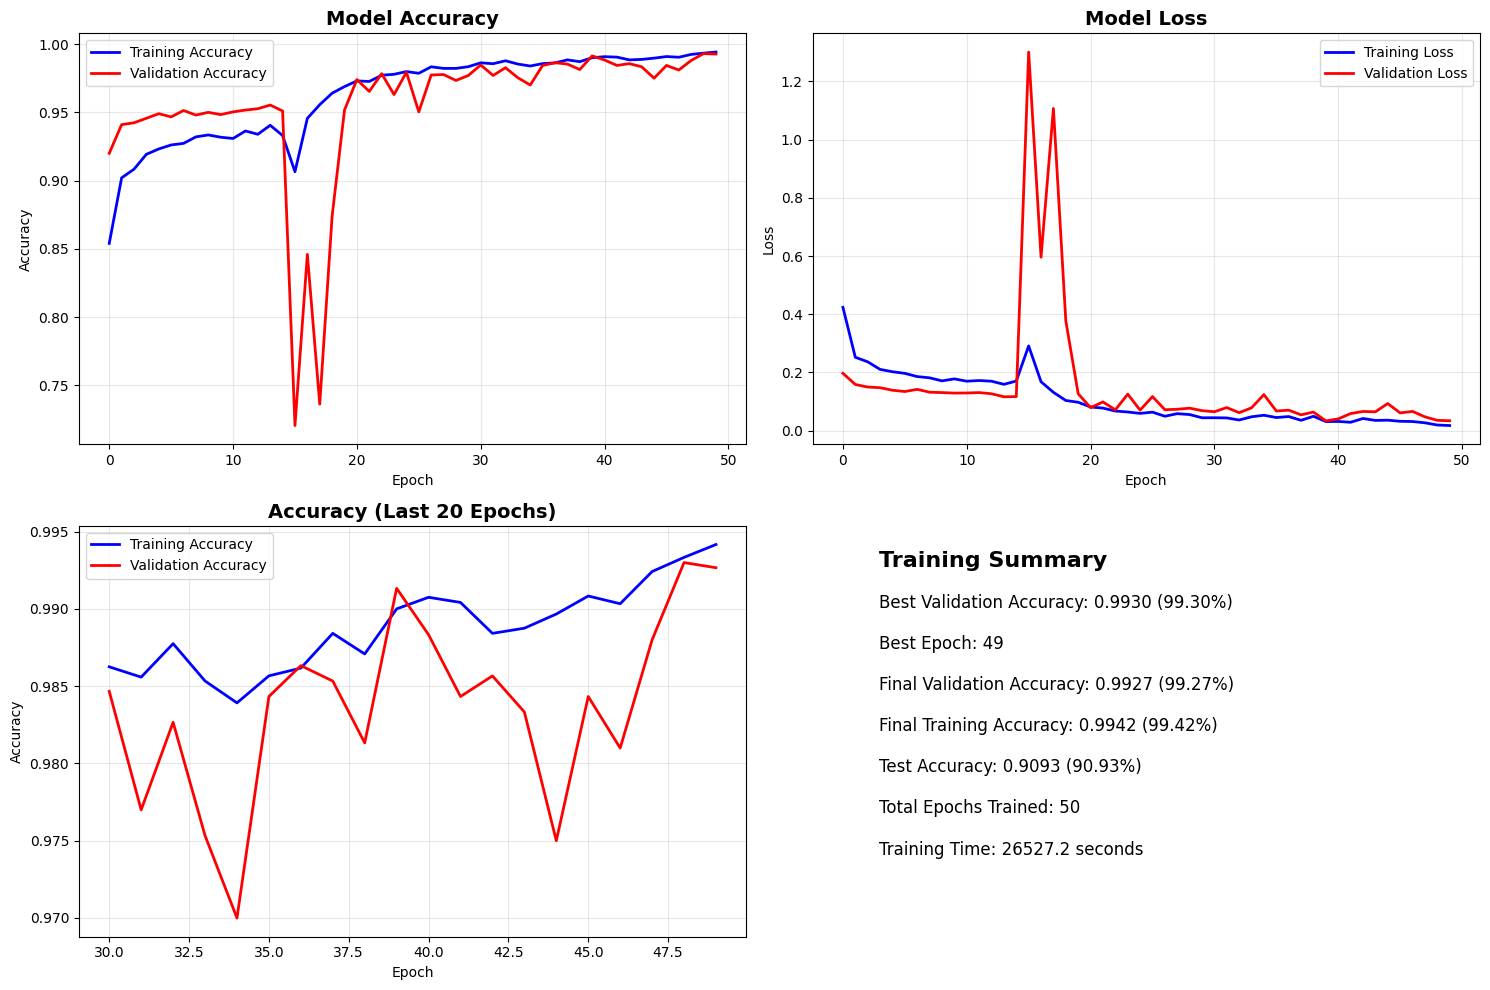


TRAINING COMPLETE!
✅ Best model saved as: best_document_classifier_model.keras
✅ Best validation accuracy: 0.9930 (99.30%)
✅ Test accuracy: 0.9093 (90.93%)
✅ Training completed in 26527.2 seconds
✅ Training history saved as: training_history.pkl

📊 PERFORMANCE SUMMARY:
----------------------------------------
Classes: 6
Training samples: ~12000
Validation samples: ~3008
Test samples: ~3008
Image size: (224, 224)
Model type: Transfer Learning (MobileNetV2)
----------------------------------------


In [5]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2

# ========================
# Step 1: Define constants
# ========================
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
NUM_CLASSES = 6
EPOCHS = 50
INITIAL_LR = 1e-3

# =============================
# Step 2: Load and preprocess data
# =============================
train_data_dir = "document_dataset/Train"
test_data_dir = "document_dataset/Test"

print("Loading training data...")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,  
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int"
)

print("Loading validation data...")
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,  
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int"
)

print("Loading test data...")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int"
)

# Get class names
class_names = train_data.class_names
print(f"Classes found: {class_names}")

# =========================
# Step 3: Data Augmentation
# =========================
def augment(image, label):
    """Simplified but effective data augmentation to prevent overfitting"""
    # Basic augmentations that work reliably
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.random_saturation(image, 0.9, 1.1)
    
    # Random rotation (90, 180, 270 degrees)
    image = tf.image.rot90(image, k=tf.random.uniform([], 0, 4, dtype=tf.int32))
    
    # Random zoom using central crop and resize (simpler approach)
    zoom_factor = tf.random.uniform([], 0.8, 1.0)
    if tf.random.uniform([]) > 0.5:  # Apply zoom 50% of the time
        # Calculate crop size based on zoom factor
        crop_size = tf.cast(224.0 * zoom_factor, tf.int32)
        crop_size = tf.maximum(crop_size, 180)  # Minimum crop size
        
        # Central crop
        image = tf.image.resize_with_crop_or_pad(image, crop_size, crop_size)
        # Resize back to original size
        image = tf.image.resize(image, IMAGE_SIZE)
    
    return image, label

# Performance optimization
AUTOTUNE = tf.data.AUTOTUNE

# Apply augmentation only to training data
print("Applying data augmentation...")
train_data_augmented = train_data.map(augment, num_parallel_calls=AUTOTUNE)

# Normalize all datasets
train_data_final = train_data_augmented.map(
    lambda x, y: (tf.cast(x, tf.float32) / 255.0, y), 
    num_parallel_calls=AUTOTUNE
)
validation_data_final = validation_data.map(
    lambda x, y: (tf.cast(x, tf.float32) / 255.0, y), 
    num_parallel_calls=AUTOTUNE
)
test_data_final = test_data.map(
    lambda x, y: (tf.cast(x, tf.float32) / 255.0, y), 
    num_parallel_calls=AUTOTUNE
)

# Prefetch for performance
train_data_final = train_data_final.prefetch(buffer_size=AUTOTUNE)
validation_data_final = validation_data_final.prefetch(buffer_size=AUTOTUNE)
test_data_final = test_data_final.prefetch(buffer_size=AUTOTUNE)

print("Data preprocessing completed!")

# ====================
# Step 4: Model Architecture
# ====================
def create_transfer_model():
    """Create model using transfer learning with MobileNetV2"""
    print("Creating transfer learning model with MobileNetV2...")
    
    # Load pre-trained base model
    base_model = MobileNetV2(
        input_shape=(*IMAGE_SIZE, 3),
        include_top=False,
        weights='imagenet'
    )
    
    # Freeze base model initially
    base_model.trainable = False
    
    # Add custom classification head
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model, base_model

def create_custom_model():
    """Create custom CNN model"""
    print("Creating custom CNN model...")
    
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(*IMAGE_SIZE, 3)),
        
        # First block
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        # Second block
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        # Third block
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        # Fourth block
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.GlobalAveragePooling2D(),
        
        # Classifier
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

# Choose model type
USE_TRANSFER_LEARNING = True  # Set to False for custom CNN

if USE_TRANSFER_LEARNING:
    model, base_model = create_transfer_model()
else:
    model = create_custom_model()
    base_model = None

# Compile model
print("Compiling model...")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# ==================================
# Step 5: Callbacks Setup
# ==================================
checkpoint_path = "best_document_classifier_model.keras"

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True, 
        verbose=1,
        mode='max'
    ),
    ModelCheckpoint(
        filepath=checkpoint_path, 
        monitor='val_accuracy', 
        save_best_only=True, 
        verbose=1,
        mode='max'
    ),
    ReduceLROnPlateau(
        monitor='val_accuracy', 
        factor=0.5, 
        patience=5,
        min_lr=1e-7, 
        verbose=1,
        mode='max'
    )
]

# =======================
# Step 6: Training
# =======================
print("Starting training...")
start_time = time.time()

if USE_TRANSFER_LEARNING:
    print("\n" + "="*50)
    print("PHASE 1: Training with frozen base model")
    print("="*50)
    
    # Phase 1: Train with frozen base
    history1 = model.fit(
        train_data_final,
        validation_data=validation_data_final,
        epochs=15,
        callbacks=callbacks,
        verbose=1
    )
    
    print("\n" + "="*50)
    print("PHASE 2: Fine-tuning with unfrozen base model")
    print("="*50)
    
    # Phase 2: Unfreeze and fine-tune
    base_model.trainable = True
    
    # Use lower learning rate for fine-tuning
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR/10),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Reset callbacks for phase 2
    callbacks_phase2 = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=15,
            restore_best_weights=True, 
            verbose=1,
            mode='max'
        ),
        ModelCheckpoint(
            filepath=checkpoint_path, 
            monitor='val_accuracy', 
            save_best_only=True, 
            verbose=1,
            mode='max'
        ),
        ReduceLROnPlateau(
            monitor='val_accuracy', 
            factor=0.5, 
            patience=7,
            min_lr=1e-8, 
            verbose=1,
            mode='max'
        )
    ]
    
    # Continue training
    history2 = model.fit(
        train_data_final,
        validation_data=validation_data_final,
        epochs=EPOCHS,
        initial_epoch=len(history1.history['loss']),
        callbacks=callbacks_phase2,
        verbose=1
    )
    
    # Combine histories
    history = {
        'loss': history1.history['loss'] + history2.history['loss'],
        'accuracy': history1.history['accuracy'] + history2.history['accuracy'],
        'val_loss': history1.history['val_loss'] + history2.history['val_loss'],
        'val_accuracy': history1.history['val_accuracy'] + history2.history['val_accuracy']
    }
    
else:
    # Single phase training for custom model
    history = model.fit(
        train_data_final,
        validation_data=validation_data_final,
        epochs=EPOCHS,
        callbacks=callbacks,
        verbose=1
    )
    history = history.history

end_time = time.time()
print(f"\n✅ Training completed in {end_time - start_time:.2f} seconds")

# =======================
# Step 7: Model Evaluation
# =======================
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Load best model
print("Loading best model...")
best_model = tf.keras.models.load_model(checkpoint_path)

# Evaluate on validation data
print("Evaluating on validation data...")
val_loss, val_accuracy = best_model.evaluate(validation_data_final, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

# Evaluate on test data
print("Evaluating on test data...")
test_loss, test_accuracy = best_model.evaluate(test_data_final, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# =======================
# Step 8: Training Visualization
# =======================
print("\nGenerating training plots...")

# Create training history plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot accuracy
ax1.plot(history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax1.plot(history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot loss
ax2.plot(history['loss'], label='Training Loss', color='blue', linewidth=2)
ax2.plot(history['val_loss'], label='Validation Loss', color='red', linewidth=2)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot accuracy zoomed (last 20 epochs)
start_epoch = max(0, len(history['accuracy']) - 20)
ax3.plot(range(start_epoch, len(history['accuracy'])), 
         history['accuracy'][start_epoch:], label='Training Accuracy', color='blue', linewidth=2)
ax3.plot(range(start_epoch, len(history['val_accuracy'])), 
         history['val_accuracy'][start_epoch:], label='Validation Accuracy', color='red', linewidth=2)
ax3.set_title('Accuracy (Last 20 Epochs)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Summary statistics
max_val_acc = max(history['val_accuracy'])
max_val_acc_epoch = history['val_accuracy'].index(max_val_acc)
final_val_acc = history['val_accuracy'][-1]
final_train_acc = history['accuracy'][-1]

ax4.axis('off')
ax4.text(0.1, 0.9, 'Training Summary', fontsize=16, fontweight='bold', transform=ax4.transAxes)
ax4.text(0.1, 0.8, f'Best Validation Accuracy: {max_val_acc:.4f} ({max_val_acc*100:.2f}%)', 
         fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.7, f'Best Epoch: {max_val_acc_epoch + 1}', fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.6, f'Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)', 
         fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.5, f'Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)', 
         fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.4, f'Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)', 
         fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.3, f'Total Epochs Trained: {len(history["accuracy"])}', 
         fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.2, f'Training Time: {end_time - start_time:.1f} seconds', 
         fontsize=12, transform=ax4.transAxes)

plt.tight_layout()
plt.show()

# =======================
# Step 9: Save Final Results
# =======================
print(f"\n{'='*60}")
print("TRAINING COMPLETE!")
print(f"{'='*60}")
print(f"✅ Best model saved as: {checkpoint_path}")
print(f"✅ Best validation accuracy: {max_val_acc:.4f} ({max_val_acc*100:.2f}%)")
print(f"✅ Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"✅ Training completed in {end_time - start_time:.1f} seconds")
print(f"{'='*60}")

# Optional: Save training history
import pickle
history_path = "training_history.pkl"
with open(history_path, 'wb') as f:
    pickle.dump(history, f)
print(f"✅ Training history saved as: {history_path}")

# Print model performance summary
print("\n📊 PERFORMANCE SUMMARY:")
print("-" * 40)
print(f"Classes: {NUM_CLASSES}")
print(f"Training samples: ~{len(train_data) * BATCH_SIZE}")
print(f"Validation samples: ~{len(validation_data) * BATCH_SIZE}")
print(f"Test samples: ~{len(test_data) * BATCH_SIZE}")
print(f"Image size: {IMAGE_SIZE}")
print(f"Model type: {'Transfer Learning (MobileNetV2)' if USE_TRANSFER_LEARNING else 'Custom CNN'}")
print("-" * 40)

In [6]:
# ===============================
# TinyML Model Conversion Pipeline
# ===============================

import tensorflow as tf
import numpy as np
import os
from pathlib import Path

print("TensorFlow version:", tf.__version__)

# ===============================
# Step 1: Load Your Trained Model
# ===============================
model_path = "best_document_classifier_model.keras"
model = tf.keras.models.load_model(model_path)

print(f"Original model loaded from {model_path}")
print(f"Model size: {os.path.getsize(model_path) / (1024*1024):.2f} MB")

# Get model summary
model.summary()

# ===============================
# Step 2: Create Representative Dataset
# ===============================
def create_representative_dataset():
    """Create representative dataset for quantization"""
    # Load some sample data for quantization calibration
    IMAGE_SIZE = (224, 224)
    BATCH_SIZE = 1  # Use batch size 1 for TinyML
    
    # You can use your validation data for this
    val_data_dir = "document_dataset/Train"  # Use train dir with validation split
    
    representative_data = tf.keras.preprocessing.image_dataset_from_directory(
        val_data_dir,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        label_mode="int"
    )
    
    # Normalize the data (same as training)
    representative_data = representative_data.map(
        lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)
    )
    
    def representative_data_gen():
        for sample, _ in representative_data.take(100):  # Use 100 samples
            yield [sample]
    
    return representative_data_gen

# ===============================
# Step 3: TensorFlow Lite Conversion
# ===============================
def convert_to_tflite(model, optimization_level="full"):
    """Convert model to TensorFlow Lite with different optimization levels"""
    
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    
    if optimization_level == "basic":
        # Basic optimization (floating point)
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        tflite_model = converter.convert()
        suffix = "_float16.tflite"
        
    elif optimization_level == "full":
        # Full integer quantization
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        converter.representative_dataset = create_representative_dataset()
        converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
        converter.inference_input_type = tf.int8
        converter.inference_output_type = tf.int8
        tflite_model = converter.convert()
        suffix = "_int8.tflite"
        
    elif optimization_level == "dynamic":
        # Dynamic range quantization
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        tflite_model = converter.convert()
        suffix = "_dynamic.tflite"
    
    else:
        # No optimization
        tflite_model = converter.convert()
        suffix = "_unoptimized.tflite"
    
    return tflite_model, suffix

# Convert with different optimization levels
optimization_levels = ["basic", "dynamic", "full"]
tflite_models = {}

for opt_level in optimization_levels:
    print(f"\n{'='*50}")
    print(f"Converting with {opt_level} optimization...")
    print(f"{'='*50}")
    
    try:
        tflite_model, suffix = convert_to_tflite(model, opt_level)
        
        # Save the model
        tflite_filename = f"document_classifier{suffix}"
        with open(tflite_filename, 'wb') as f:
            f.write(tflite_model)
        
        # Get file size
        file_size = os.path.getsize(tflite_filename) / 1024  # in KB
        
        print(f"✅ {opt_level.capitalize()} optimization completed!")
        print(f"📁 Saved as: {tflite_filename}")
        print(f"📊 File size: {file_size:.2f} KB")
        
        tflite_models[opt_level] = {
            'model': tflite_model,
            'filename': tflite_filename,
            'size_kb': file_size
        }
        
    except Exception as e:
        print(f"❌ {opt_level.capitalize()} optimization failed: {str(e)}")

# ===============================
# Step 4: Model Evaluation
# ===============================
def evaluate_tflite_model(tflite_model_path, test_data_dir):
    """Evaluate TensorFlow Lite model accuracy"""
    
    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()
    
    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    print(f"Input shape: {input_details[0]['shape']}")
    print(f"Input type: {input_details[0]['dtype']}")
    print(f"Output shape: {output_details[0]['shape']}")
    print(f"Output type: {output_details[0]['dtype']}")
    
    # Load test data
    IMAGE_SIZE = (224, 224)
    BATCH_SIZE = 1
    
    test_data = tf.keras.preprocessing.image_dataset_from_directory(
        test_data_dir,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        label_mode="int",
        shuffle=False
    )
    
    # Normalize test data
    test_data = test_data.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
    
    correct_predictions = 0
    total_predictions = 0
    
    print("Evaluating TFLite model...")
    
    for images, labels in test_data.take(100):  # Test on 100 samples for speed
        for i in range(len(images)):
            # Prepare input
            input_data = images[i:i+1].numpy()
            
            # Convert to int8 if model expects int8
            if input_details[0]['dtype'] == np.int8:
                input_data = (input_data * 255 - 128).astype(np.int8)
            
            # Set input tensor
            interpreter.set_tensor(input_details[0]['index'], input_data)
            
            # Run inference
            interpreter.invoke()
            
            # Get output
            output_data = interpreter.get_tensor(output_details[0]['index'])
            
            # Convert output if needed
            if output_details[0]['dtype'] == np.int8:
                # Dequantize output
                scale, zero_point = output_details[0]['quantization']
                output_data = scale * (output_data - zero_point)
            
            predicted_class = np.argmax(output_data[0])
            true_class = labels[i].numpy()
            
            if predicted_class == true_class:
                correct_predictions += 1
            total_predictions += 1
    
    accuracy = correct_predictions / total_predictions
    return accuracy

# Evaluate all models
print(f"\n{'='*60}")
print("MODEL EVALUATION RESULTS")
print(f"{'='*60}")

original_size = os.path.getsize(model_path) / 1024  # KB
print(f"Original Keras model: {original_size:.2f} KB")

for opt_level, model_info in tflite_models.items():
    print(f"\n{opt_level.upper()} OPTIMIZATION:")
    print("-" * 40)
    print(f"File size: {model_info['size_kb']:.2f} KB")
    print(f"Size reduction: {(original_size / model_info['size_kb']):.1f}x smaller")
    
    try:
        accuracy = evaluate_tflite_model(model_info['filename'], "document_dataset/Test")
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    except Exception as e:
        print(f"Evaluation failed: {str(e)}")

# ===============================
# Step 5: Create Inference Script
# ===============================
inference_script = '''
# ===============================
# TinyML Inference Script
# ===============================

import tensorflow as tf
import numpy as np
from PIL import Image
import sys

class DocumentClassifier:
    def __init__(self, model_path):
        """Initialize TFLite model"""
        self.interpreter = tf.lite.Interpreter(model_path=model_path)
        self.interpreter.allocate_tensors()
        
        # Get input/output details
        self.input_details = self.interpreter.get_input_details()
        self.output_details = self.interpreter.get_output_details()
        
        # Class names
        self.class_names = ['exam', 'form', 'newspaper', 'note', 'story', 'word']
        
        print(f"Model loaded: {model_path}")
        print(f"Input shape: {self.input_details[0]['shape']}")
        print(f"Input type: {self.input_details[0]['dtype']}")
        
    def preprocess_image(self, image_path):
        """Preprocess image for inference"""
        # Load and resize image
        image = Image.open(image_path).convert('RGB')
        image = image.resize((224, 224))
        
        # Convert to numpy array
        image_array = np.array(image, dtype=np.float32)
        
        # Normalize to 0-1
        image_array = image_array / 255.0
        
        # Add batch dimension
        image_array = np.expand_dims(image_array, axis=0)
        
        # Convert to int8 if model expects it
        if self.input_details[0]['dtype'] == np.int8:
            image_array = (image_array * 255 - 128).astype(np.int8)
            
        return image_array
        
    def predict(self, image_path):
        """Make prediction on image"""
        # Preprocess image
        input_data = self.preprocess_image(image_path)
        
        # Set input tensor
        self.interpreter.set_tensor(self.input_details[0]['index'], input_data)
        
        # Run inference
        self.interpreter.invoke()
        
        # Get output
        output_data = self.interpreter.get_tensor(self.output_details[0]['index'])
        
        # Dequantize if needed
        if self.output_details[0]['dtype'] == np.int8:
            scale, zero_point = self.output_details[0]['quantization']
            output_data = scale * (output_data - zero_point)
        
        # Get prediction
        probabilities = tf.nn.softmax(output_data[0]).numpy()
        predicted_class = np.argmax(probabilities)
        confidence = probabilities[predicted_class]
        
        return {
            'class': self.class_names[predicted_class],
            'confidence': float(confidence),
            'probabilities': {self.class_names[i]: float(prob) 
                            for i, prob in enumerate(probabilities)}
        }

# Example usage
if __name__ == "__main__":
    if len(sys.argv) != 3:
        print("Usage: python inference.py <model_path> <image_path>")
        sys.exit(1)
        
    model_path = sys.argv[1]
    image_path = sys.argv[2]
    
    # Initialize classifier
    classifier = DocumentClassifier(model_path)
    
    # Make prediction
    result = classifier.predict(image_path)
    
    print(f"\\nPrediction Results:")
    print(f"Document Type: {result['class']}")
    print(f"Confidence: {result['confidence']:.4f} ({result['confidence']*100:.2f}%)")
    print(f"\\nAll Probabilities:")
    for class_name, prob in result['probabilities'].items():
        print(f"  {class_name}: {prob:.4f} ({prob*100:.2f}%)")
'''

# Save inference script
with open("tinyml_inference.py", "w") as f:
    f.write(inference_script)

print(f"\n{'='*60}")
print("CONVERSION COMPLETE!")
print(f"{'='*60}")
print("📁 Files created:")
for opt_level, model_info in tflite_models.items():
    print(f"  • {model_info['filename']} ({model_info['size_kb']:.2f} KB)")
print("  • tinyml_inference.py (inference script)")
print(f"\n💡 Usage example:")
print(f"python tinyml_inference.py document_classifier_int8.tflite image.jpg")
print(f"\n🚀 Ready for deployment on edge devices!")

TensorFlow version: 2.19.0
Original model loaded from best_document_classifier_model.keras
Model size: 35.35 MB


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,086,292 (34.66 MB)

 Trainable params: 3,016,198 (11.51 MB)

 Non-trainable params: 37,696 (147.25 KB)

 Optimizer params: 6,032,398 (23.01 MB)


Converting with basic optimization...
INFO:tensorflow:Assets written to: C:\Users\brend\AppData\Local\Temp\tmpq3ioys1l\assets


INFO:tensorflow:Assets written to: C:\Users\brend\AppData\Local\Temp\tmpq3ioys1l\assets


Saved artifact at 'C:\Users\brend\AppData\Local\Temp\tmpq3ioys1l'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2008410340816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410341008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410340624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410341200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864584656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864584464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864585232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010

INFO:tensorflow:Assets written to: C:\Users\brend\AppData\Local\Temp\tmpz4yvc2fz\assets


Saved artifact at 'C:\Users\brend\AppData\Local\Temp\tmpz4yvc2fz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2008410340816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410341008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410340624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410341200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864584656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864584464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864585232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010

INFO:tensorflow:Assets written to: C:\Users\brend\AppData\Local\Temp\tmp5y7j_odc\assets


Saved artifact at 'C:\Users\brend\AppData\Local\Temp\tmp5y7j_odc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2008410340816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410341008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410340624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008410341200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864584656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864584464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864583888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010864585232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2010

C:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


✅ Full optimization completed!
📁 Saved as: document_classifier_int8.tflite
📊 File size: 3436.90 KB

MODEL EVALUATION RESULTS
Original Keras model: 36202.00 KB

BASIC OPTIMIZATION:
----------------------------------------
File size: 3229.62 KB
Size reduction: 11.2x smaller
Input shape: [  1 224 224   3]
Input type: <class 'numpy.float32'>
Output shape: [1 6]
Output type: <class 'numpy.float32'>
Found 3000 files belonging to 6 classes.


C:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Evaluating TFLite model...
Accuracy: 0.9000 (90.00%)

DYNAMIC OPTIMIZATION:
----------------------------------------
File size: 3229.62 KB
Size reduction: 11.2x smaller
Input shape: [  1 224 224   3]
Input type: <class 'numpy.float32'>
Output shape: [1 6]
Output type: <class 'numpy.float32'>
Found 3000 files belonging to 6 classes.
Evaluating TFLite model...
Accuracy: 0.9000 (90.00%)

FULL OPTIMIZATION:
----------------------------------------
File size: 3436.90 KB
Size reduction: 10.5x smaller
Input shape: [  1 224 224   3]
Input type: <class 'numpy.int8'>
Output shape: [1 6]
Output type: <class 'numpy.int8'>
Found 3000 files belonging to 6 classes.
Evaluating TFLite model...
Accuracy: 0.2800 (28.00%)

CONVERSION COMPLETE!
📁 Files created:
  • document_classifier_float16.tflite (3229.62 KB)
  • document_classifier_dynamic.tflite (3229.62 KB)
  • document_classifier_int8.tflite (3436.90 KB)
  • tinyml_inference.py (inference script)

💡 Usage example:
python tinyml_inference.py document